# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования: 
    
1.Определить рыночную стоимость объектов недвижимости. 
    
2.Построить автоматизированную систему для того, чтобы отследить аномалии и мошенническую деятельность. 
    
3.Определить факторы, влияющие на ценообразование стоимости квартир.
    
    
Ход исследования:
    
1. Открою файл с данными (/datasets/real_estate_data.csv) и изучу общую информацию. 

2. Проведу предобработку данных.
    
3. Посчитаю и добавлю в таблицу новые данные.
    
4. Проведу анализ факторов, влияющих на ценообразование стоимости квартир.
    
5. Сформулирую общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['total_images' 'rooms' 'floor']

Type: float64
['last_price' 'total_area' 'ceiling_height' 'floors_total' 'living_area'
 'kitchen_area' 'balcony' 'airports_nearest' 'cityCenters_nearest'
 'parks_around3000' 'parks_nearest' 'ponds_around3000' 'ponds_nearest'
 'days_exposition']

Type: object
['first_day_exposition' 'is_apartment' 'locality_name']

Type: bool
['studio' 'open_plan']



Исходные данные содержат 23699 наблюдений (строк) и 21 характеристик (столбцов). В первом столбце содержится порядковый номер наблюдения. Мы наблюдаем большое количество пропущенных значений. 3 характеристики имеют тип данных object (строковые переменные), 3 - int64 (целые числа), 14 - float64 (числа с плавающей точкой), 2 - bool (логический тип данных).
К категориальным переменным относятся:'first_day_exposition', 'is_apartment', 'locality_name'(необходимо отметить, что корректно в дальнейшем поменять тип данных для переменной 'first_day_exposition')
Количественные переменные: 'total_images', 'rooms', 'floor', 'last_price', 'total_area', 'ceiling_height', 'floors_total' 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000'. 'ponds_nearest','days_exposition'.
Логические переменные: 'studio' 'open_plan'.

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Исходя из таблицы можно сделать вывод, что данные содержат большое количество аномальных значений. Например, минимальное значенией переменной 'rooms' равно 0, т.е. минимальное количество комнат равно 0. Однако, мы можем предположить, что имеем дело со студией. Максимальный показатель равен 19, т.е. максимальное количество комнат равно 19, при этом максимальная площадь квартиры равна 900 кв.м, что является не очень реалистичным. Максимальное значение переменной 'ceiling_height' равно 100 метров, а минимальное 1 метр, что говорит о неправодподобности представленных данных.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

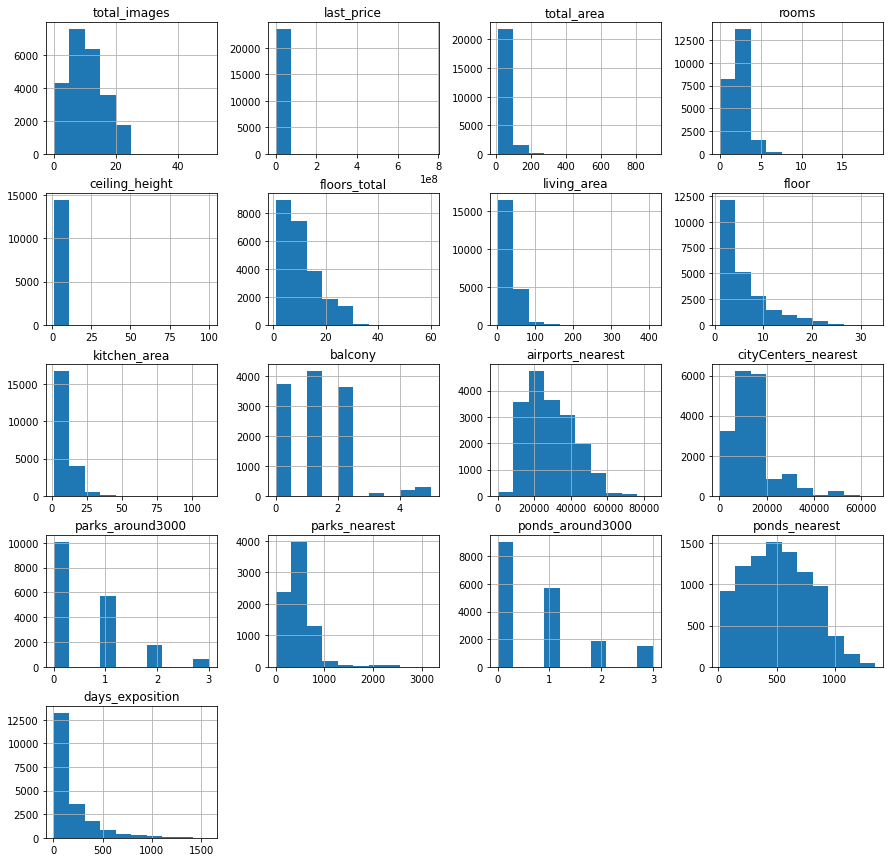

In [5]:
df.hist(figsize=(15,15))

### Предобработка данных

#### Пропущенные значения

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

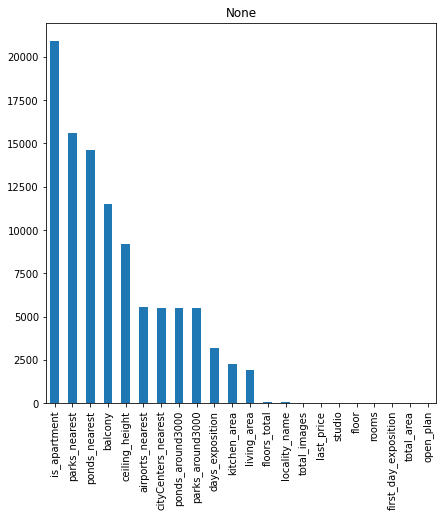

In [7]:
df.isna().sum().sort_values(ascending = False).plot.bar(subplots=True, figsize=(7, 7))

Исходя из графика можно заметить, что больше всего пропущенных значений в переменной is_apartment. Из 23699 значений пропущено 20924, что является почти 90% пропусков. Кроме того, переменные parks_nearest, ponds_nearest, balcony и ceiling_height содержат большое количество пропусков.

In [8]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)

В Санкт-Петербурге на рынке недвижимости доля апартаментов для постоянного проживания составляет около 7%, что говорит о непопулярности аппартаментов. Можно предположить, что из 23699 объявлений на рынке недвижимости могут быть представлены только 50 объявлений такого типа. Поэтому заменю пропущенные показатели на False.

В датафрейме представлены столбцы с пропущенными значениями в данных о расстоянии (например, в таких переменных, как 'parks_nearest', 'ponds_nearest'). Данные скорее всего были получены автоматически, поэтому не получится заменить пропущенные значения.

In [10]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [11]:
df['balcony'] = df['balcony'].fillna(0)

Сейчас большинство строительных компаний возводят дома, которые не предусматривают балконы в качестве обязательных элементов жилья. Можно заменить пропущенные значения на 0, что будет означать отсутствие балкона в данном доме.

In [12]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Отфильтруем все значения, в которых высота потолка больше 6. Наиболее распространенной высотой потолка является 3 м. Можно предположить, что мы также имеем дело с двухуровневыми квартирами, высота потолка в которых равна 6 (умножаем показатели на 2).

In [13]:
df.query('ceiling_height > 6') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,False,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Предположим, что скорее всего при заполнении данных по переменной 'ceiling_height' забыли разделить числа запятой, т.е. там, где 37, то скорее всего это 3.7. 
Заменим пропуски средним значением.

In [14]:
mean_ceiling_height = df['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].fillna(mean_ceiling_height)

Заменим пропуски средним значением в переменных 'floors_total', 'living_area' и 'kitchen_area'.

In [15]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [16]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [17]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [18]:
mean_floors_total = df['floors_total'].mean()
df['floors_total'] = df['floors_total'].fillna(mean_floors_total)
mean_living_area = df['living_area'].mean()
df['living_area'] = df['living_area'].fillna(mean_living_area)
mean_kitchen_area = df['kitchen_area'].mean()
df['kitchen_area'] = df['kitchen_area'].fillna(mean_kitchen_area)

In [19]:
df = df.dropna(subset = ['locality_name']) # удалим пропуски в перменной 'locality_name'

In [20]:
df.duplicated().sum()

0

#### Изменение типа данных

In [21]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [22]:
df['floors_total'] = df['floors_total'].astype(int)

In [23]:
df['balcony'] = df['balcony'].astype(int) 

In [24]:
df['last_price'] = df['last_price'].astype(int) 

In [25]:
df['total_images'] = df['total_images'].astype(int)

In [26]:
df['total_area'] = df['total_area'].astype(int)

In [27]:
df['ceiling_height'] = df['ceiling_height'].astype(int)

In [28]:
df['living_area'] = df['living_area'].astype(int)

In [29]:
df['kitchen_area'] = df['kitchen_area'].astype(int)

In [30]:
df['total_images'] = df['total_images'].astype(int)

По остальным рассматриваемым переменным мы не стали заменять пропуски, так как данные по ним были получены автоматически. Пристутсвие пропусков не позволяет нам изменить тип данных с float на int.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  int64         
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  int64         
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  int64         
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  int64         
 13  balcony         

#### Удаление неявных дубликатов

In [32]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [33]:
dictionary = {'садоводческое некоммерческое товарищество  ','поселок городского типа  ', 'поселок  ', 'посёлок  ', 'деревня  ', 'городской посёлок  ', 'коттеджный поселок',
              'садовое товарищество  ', 'посёлок при железнодорожной станции  ', 'село  ','городского типа  ', 'станции'}#создадим словарь
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].replace(dictionary, '', regex=True)
df['locality_name'] = df['locality_name'].str.strip() #уберем пробелы перед названием

#### Обработка и удаление аномалий

In [34]:
round(df['last_price'].describe())

count        23650.0
mean       6541127.0
std       10896399.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

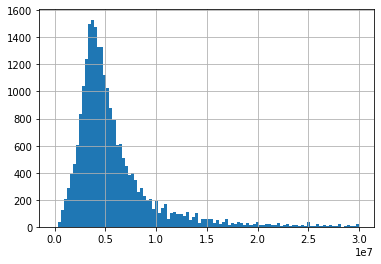

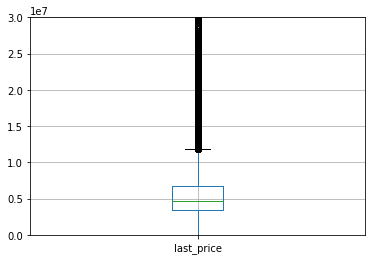

In [35]:
df['last_price'].hist(bins=100, range=(0, 30000000))
plt.show()
df.boxplot(column=['last_price'])
plt.ylim(-100, 30000000)
plt.show()

In [36]:
df.loc[(df['ceiling_height']>20), 'ceiling_height']  = df.loc[(df['ceiling_height']>20), 'ceiling_height'] / 10

In [37]:
df.loc[(df['rooms'] == 0), 'rooms'] = 1

In [38]:
df['floors_total'] = round(df['floors_total'])

В исходных данных достаточно большое количество пропусков, однако не по всем переменным. Часть пропусков была заменена средним значением, часть удалена, а часть оставлена в неизменном виде. Явных дубликатов нет. Неявные дубликаты были приведены в должный вид.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  int64         
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  int64         
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  int64         
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу:
1.цену квадратного метра
2.день недели, месяц и год публикации объявления
3.тип этажа квартиры; значения — «первый», «последний», «другой»
4.расстояние в км до центра города

Получим для каждого объявления сколько стоит 1 кв.м. его квартиры и добавим в таблицу.

In [40]:
df['price_for_m2'] = df.last_price / df.total_area
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,20,13000000,108,2019-03-07,3,2.0,16,51,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40,2018-12-04,1,2.0,11,18,1,False,...,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000
2,10,5196000,56,2015-08-20,2,2.0,5,34,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000,159,2015-07-24,3,2.0,14,34,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавим столбцы с днём недели, месяцем и годом публикации, где:
0 = понедельник,
1 = вторник,
2 = среда,
3 = четверг,
4 = пятница,
5 = суббота,
6 = воскресенье.

In [41]:
df['weekday_of_exposition'] = df.first_day_exposition.dt.weekday
df['month_of_exposition'] = df.first_day_exposition.dt.month
df['year_of_exposition'] = df.first_day_exposition.dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_of_exposition,month_of_exposition,year_of_exposition
0,20,13000000,108,2019-03-07,3,2.0,16,51,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.0,11,18,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000,1,12,2018
2,10,5196000,56,2015-08-20,2,2.0,5,34,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159,2015-07-24,3,2.0,14,34,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [42]:
df.loc[df['floor'] == 1, 'type_floor'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'type_floor'] = 'последний'
df.loc[df['type_floor'].isna(), 'type_floor'] = 'другой'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_of_exposition,month_of_exposition,year_of_exposition,type_floor
0,20,13000000,108,2019-03-07,3,2.0,16,51,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.0,11,18,1,False,...,0.0,NaN,0.0,NaN,81.0,83750.000000,1,12,2018,первый
2,10,5196000,56,2015-08-20,2,2.0,5,34,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000,159,2015-07-24,3,2.0,14,34,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


In [43]:
df.type_floor.value_counts()

другой       17405
последний     3358
первый        2887
Name: type_floor, dtype: int64

Создадим переменную расстояние до центра в км и округлим данные этой переменной (cityCenters_nearest_km). 

In [44]:
df['cityCenters_nearest_km'] = round(df.cityCenters_nearest / 1000)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_of_exposition,month_of_exposition,year_of_exposition,type_floor,cityCenters_nearest_km
0,20,13000000,108,2019-03-07,3,2.0,16,51,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40,2018-12-04,1,2.0,11,18,1,False,...,NaN,0.0,NaN,81.0,83750.000000,1,12,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,2.0,5,34,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159,2015-07-24,3,2.0,14,34,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

Text(0, 0.5, 'колличество объявлений')

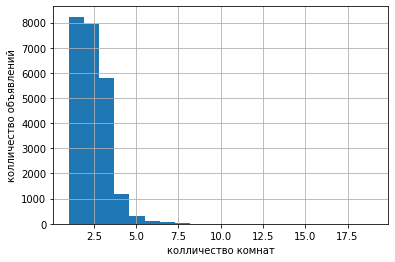

In [45]:
import seaborn as sns
ax = df.rooms.hist(bins=20)
ax.set_xlabel('колличество комнат')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'колличество комнат')]

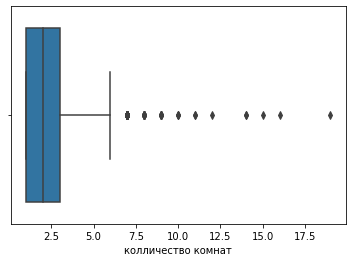

In [46]:
sns.boxplot(df.rooms).set(xlabel='колличество комнат')

Text(0, 0.5, 'колличество объявлений')

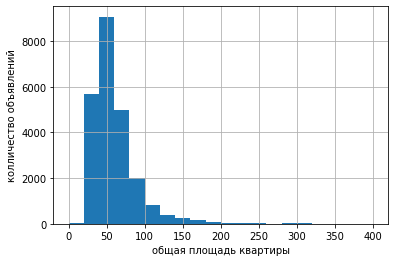

In [47]:
ax = df.total_area.hist(bins=20, range = (0,400))
ax.set_xlabel('общая площадь квартиры')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'общая площадь квартиры')]

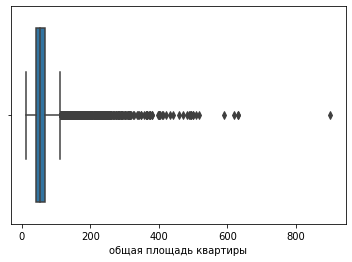

In [48]:
sns.boxplot(df.total_area).set(xlabel='общая площадь квартиры')

Text(0, 0.5, 'колличество объявлений')

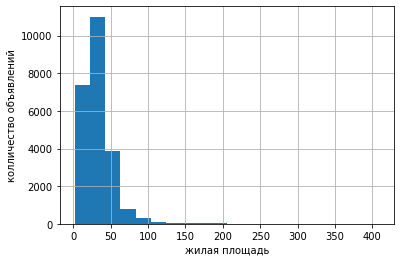

In [49]:
ax = df.living_area.hist(bins=20)
ax.set_xlabel('жилая площадь')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'жилая площадь')]

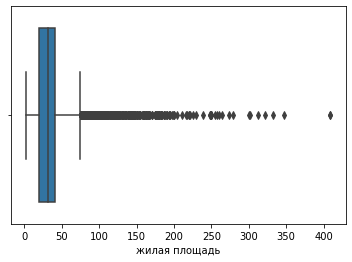

In [50]:
sns.boxplot(df.living_area).set(xlabel='жилая площадь')

Text(0, 0.5, 'колличество объявлений')

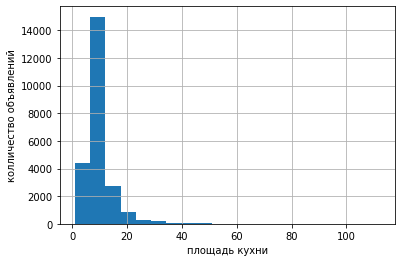

In [51]:
ax = df.kitchen_area.hist(bins=20)
ax.set_xlabel('площадь кухни')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'площадь кухни')]

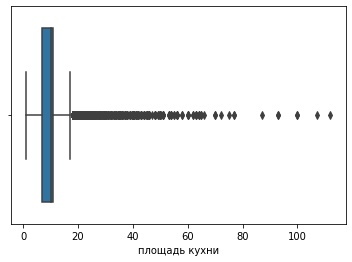

In [52]:
sns.boxplot(df.kitchen_area).set(xlabel='площадь кухни')

Text(0, 0.5, 'колличество объявлений')

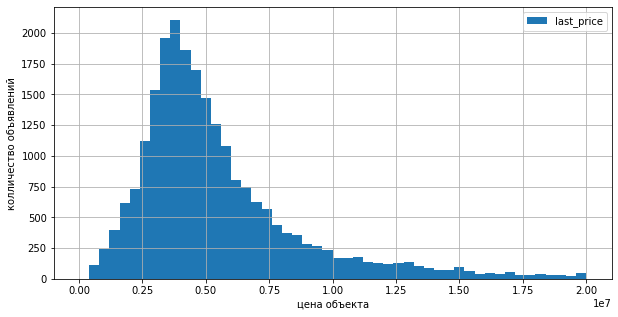

In [53]:
ax = df.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, range = (0, 20000000), figsize = (10,5))
ax.set_xlabel('цена объекта')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'цена объекта')]

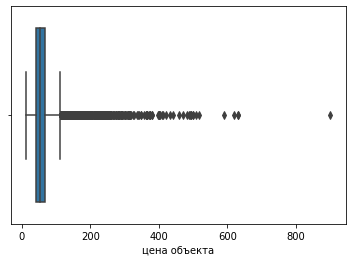

In [54]:
sns.boxplot(df.total_area).set(xlabel='цена объекта')

Text(0, 0.5, 'колличество объявлений')

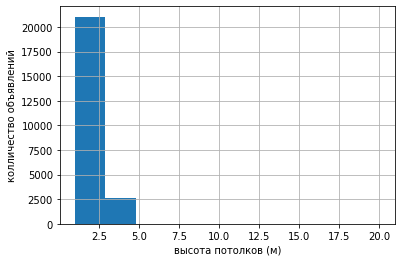

In [55]:
ax = df.ceiling_height.hist()
ax.set_xlabel('высота потолков (м)')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'высота потолков')]

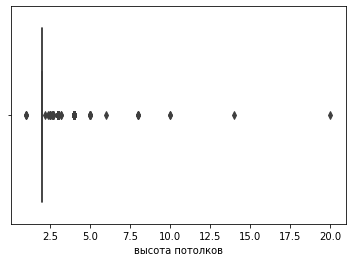

In [56]:
sns.boxplot(df.ceiling_height).set(xlabel='высота потолков')

Text(0, 0.5, 'колличество объявлений')

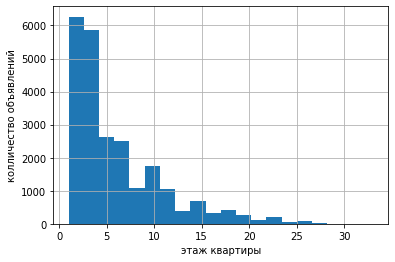

In [57]:
ax = df.floor.hist(bins=20)
ax.set_xlabel('этаж квартиры')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'этаж квартиры')]

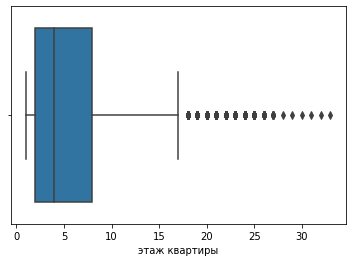

In [58]:
sns.boxplot(df.floor).set(xlabel='этаж квартиры')

In [59]:
df['type_floor'].value_counts()

другой       17405
последний     3358
первый        2887
Name: type_floor, dtype: int64

Text(0, 0.5, 'колличество объявлений')

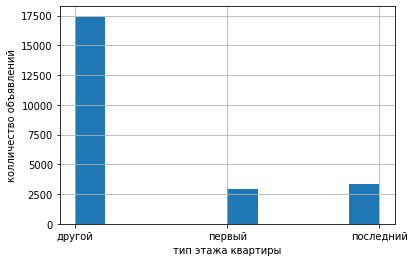

In [60]:
ax = df.type_floor.hist()
ax.set_xlabel('тип этажа квартиры')
ax.set_ylabel('колличество объявлений')

Text(0, 0.5, 'колличество объявлений')

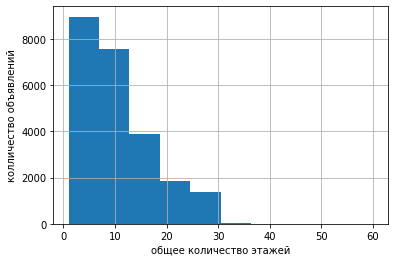

In [61]:
ax = df.floors_total.hist()
ax.set_xlabel('общее количество этажей')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'общее количество этажей')]

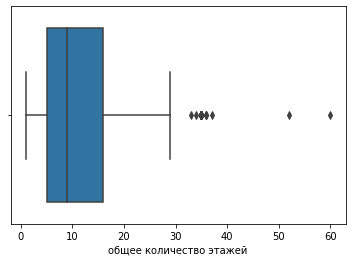

In [62]:
sns.boxplot(df.floors_total).set(xlabel='общее количество этажей')

Text(0, 0.5, 'колличество объявлений')

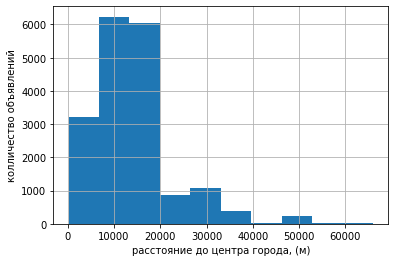

In [63]:
ax = df.cityCenters_nearest.hist()
ax.set_xlabel('расстояние до центра города, (м)')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'расстояние до центра города, (м)')]

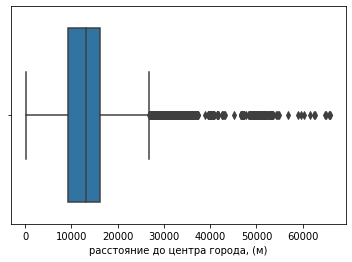

In [64]:
sns.boxplot(df.cityCenters_nearest).set(xlabel='расстояние до центра города, (м)')

Text(0, 0.5, 'колличество объявлений')

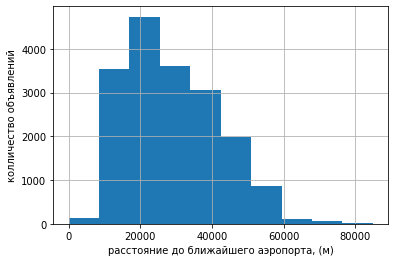

In [65]:
ax = df.airports_nearest.hist()
ax.set_xlabel('расстояние до ближайшего аэропорта, (м)')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'расстояние до ближайшего аэропорта, (м)')]

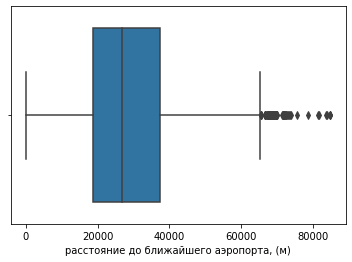

In [66]:
sns.boxplot(df.airports_nearest).set(xlabel='расстояние до ближайшего аэропорта, (м)')

Text(0, 0.5, 'колличество объявлений')

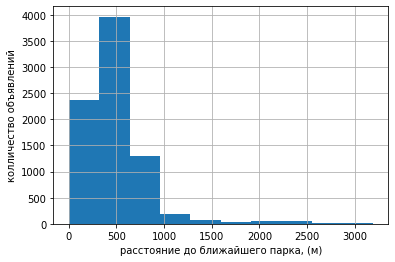

In [67]:
ax = df.parks_nearest.hist()
ax.set_xlabel('расстояние до ближайшего парка, (м)')
ax.set_ylabel('колличество объявлений')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'расстояние до ближайшего парка, (м)')]

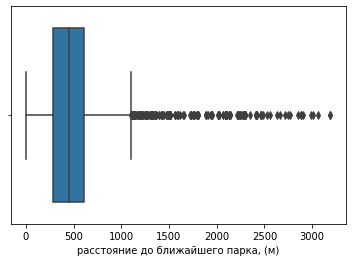

In [68]:
sns.boxplot(df.parks_nearest).set(xlabel='расстояние до ближайшего парка, (м)')

Text(0, 0.5, 'колличество объявлений')

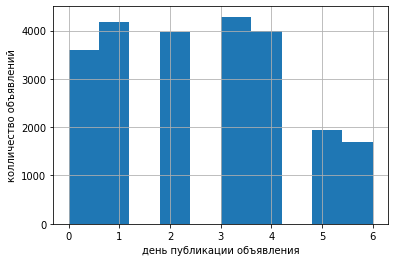

In [69]:
ax = df.weekday_of_exposition.hist()
ax.set_xlabel('день публикации объявления')
ax.set_ylabel('колличество объявлений')

Text(0, 0.5, 'колличество объявлений')

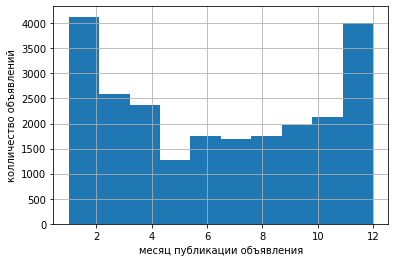

In [70]:
ax = df.month_of_exposition.hist()
ax.set_xlabel('месяц публикации объявления')
ax.set_ylabel('колличество объявлений')

Text(0, 0.5, 'колличество объявлений')

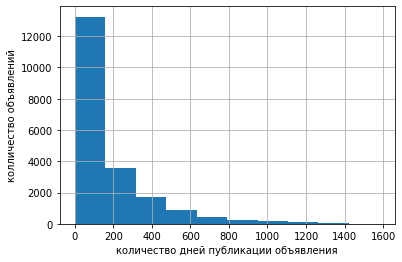

In [71]:
ax = df.days_exposition.hist()
ax.set_xlabel('количество дней публикации объявления')
ax.set_ylabel('колличество объявлений')

In [72]:
df.days_exposition.describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана и среднее значение отличаются. Будем ориентироваться на медианные значения, поэтому можно сказать, что продажа обычно занимает 95 дней. Будем считать, что быстрые продажи это те, которые входят в первый квартиль (срок продажи - до 45 дней), а долгие - в четвертый (срок продажи - больше 231 дней). При этом, много квартир было продано за 1 день, что является очень быстрыми продажами. Самые долгие составляют 1580 дней.


Рассмотрим зависимость нелинейных данных через тип графика scatter.


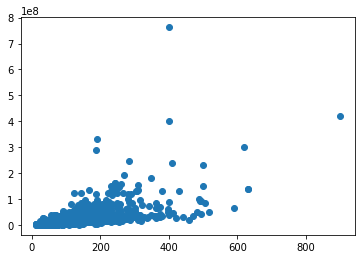

In [73]:
plt.scatter(df['total_area'], df['last_price'])

Между переменными total_area и last_price можно заметить положительную линейную взаимосвязь - чем больше площадь квартиры, тем выше её цена.

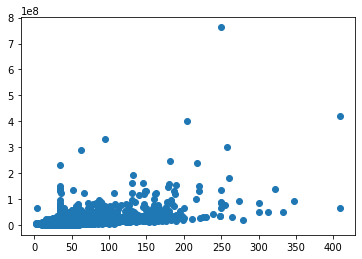

In [74]:
plt.scatter(df['living_area'], df['last_price'])

Переменные living_area и last_price также связаны положительно - большая жилая площадь означает более высокую цену.

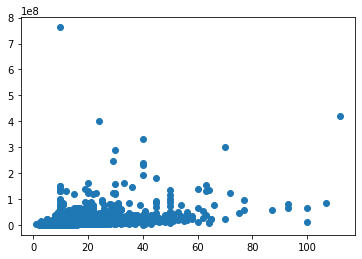

In [75]:
plt.scatter(df['kitchen_area'], df['last_price'])

Взаимосвязь между площадью кухни и ценой не прослеживается так чётко.

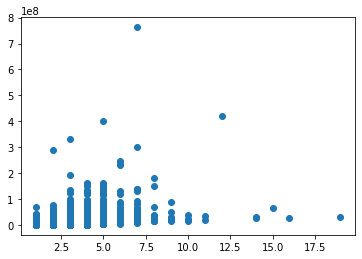

In [76]:
plt.scatter(df['rooms'], df['last_price'])

Рост количества комнат поначалу ведёт к росту цен, однако для квартир с количеством комнат больше 5, данная взаимосвязь уже не прослеживается.

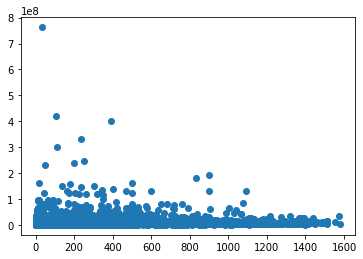

In [77]:
plt.scatter(df['days_exposition'], df['last_price'])

Количество дней после публикации слабо взаимосвязано с ценой квартиры, однако можно заметить слабую отрицательную взаимосвязь.

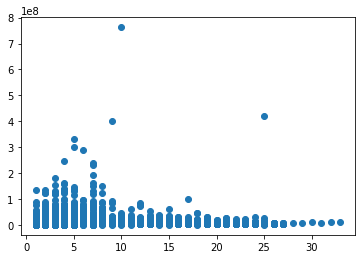

In [78]:
plt.scatter(df['floor'], df['last_price'])

[Text(0, 0.5, 'цена за квартиру'), Text(0.5, 0, 'тип этажа')]

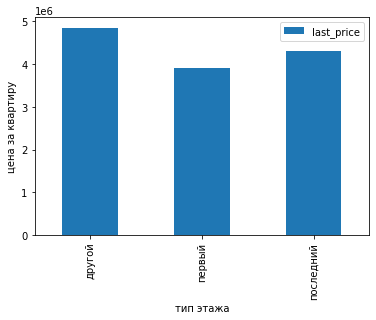

In [79]:
df.pivot_table(index='type_floor', values='last_price', aggfunc='median')\
    .plot.bar().set(ylabel='цена за квартиру', xlabel='тип этажа')

Наименьшие медианные цены на квартиры на первом и последнем этажах.

[Text(0, 0.5, 'цена за квартиру'),
 Text(0.5, 0, 'день недели размещения объявления')]

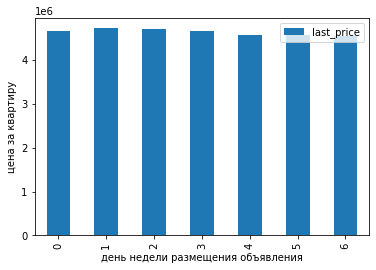

In [80]:
df.pivot_table(index='weekday_of_exposition', values='last_price', aggfunc='median')\
    .plot.bar().set(ylabel='цена за квартиру', xlabel='день недели размещения объявления')

День размещения не влияет на цену квартиры.

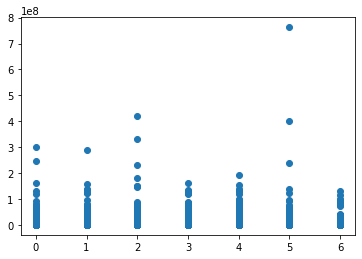

In [81]:
plt.scatter(df['weekday_of_exposition'], df['last_price'])

[Text(0, 0.5, 'цена за квартиру'), Text(0.5, 0, 'месяц размещения объявления')]

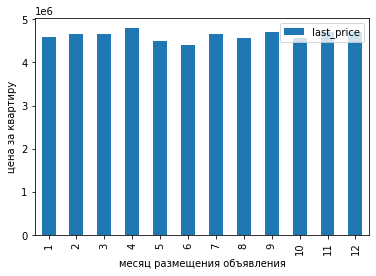

In [82]:
df.pivot_table(index='month_of_exposition', values='last_price', aggfunc='median')\
    .plot.bar().set(ylabel='цена за квартиру', xlabel='месяц размещения объявления')

Месяц размещения объявления слабо влияет на цену квартиру, однако наименьшая медианная цена наблюдается в июне.

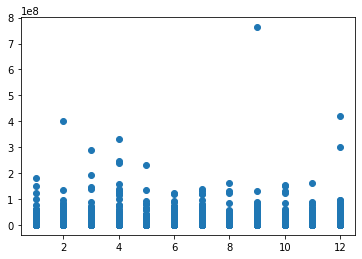

In [83]:
plt.scatter(df['month_of_exposition'], df['last_price'])

[Text(0, 0.5, 'цена за квартиру'), Text(0.5, 0, 'год размещения объявления')]

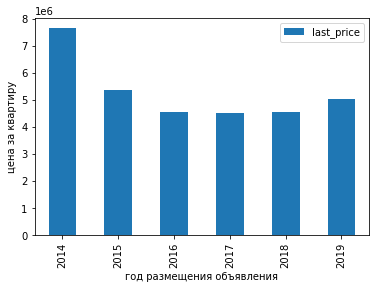

In [84]:
df.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median')\
    .plot.bar().set(ylabel='цена за квартиру', xlabel='год размещения объявления')

Наибольшие медианные цены на квартиры наблюдались в 2014 году.

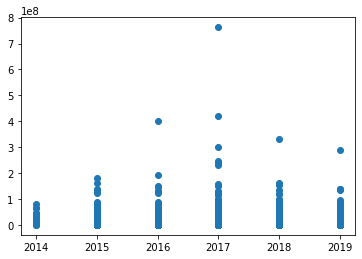

In [85]:
plt.scatter(df['year_of_exposition'], df['last_price'])

In [86]:
corr_df = df[['last_price',\
           'living_area',\
           'kitchen_area',\
           'rooms',\
           'days_exposition',\
           'total_area'
           ]]

<AxesSubplot:>

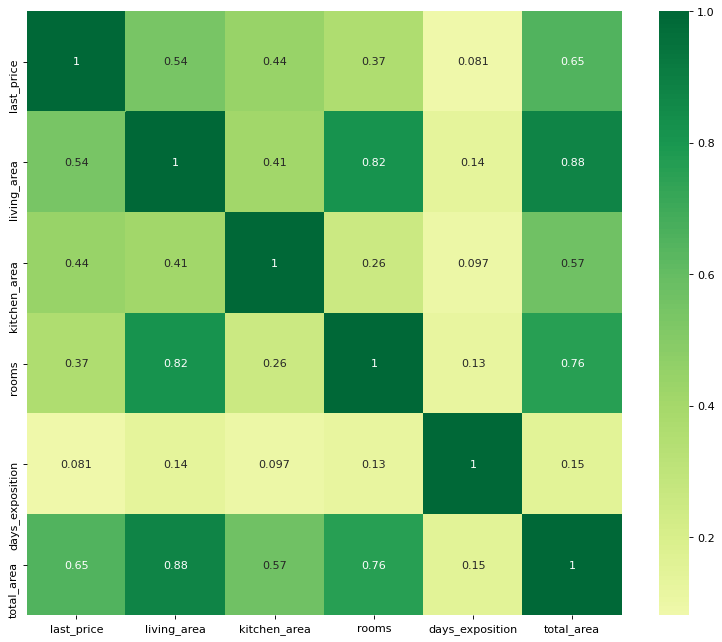

In [87]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr_df.corr(), xticklabels=corr_df.corr().columns,\
            yticklabels=corr_df.corr().columns, cmap='RdYlGn', center=0, annot=True)


Для переменных характеризующих площадь квартиры (total_area, living_area, kitchen_area) наблюдается линейная положительная взаимосвязь с ценой при этом для days_of_exposition и floor данная зависимость не наблюдается. 


In [88]:
top_10 = df.pivot_table(index='locality_name', values='price_for_m2', aggfunc=['count', 'median', 'mean'])
top_10.columns = ('count', 'median', 'mean')
top_10.sort_values('count', ascending=False).head(10)

,count,median,mean
locality_name,,,
санкт-петербург,15721,105263.157895,115347.722976
поселок мурино,556,86410.969793,86312.033181
поселок шушары,440,77223.320158,79068.602928
всеволожск,398,65811.403509,68985.235455
пушкин,369,100000.000000,103611.362825
колпино,338,74861.111111,75735.589833
поселок парголово,327,92222.222222,90675.627757
гатчина,307,67924.528302,69045.519030
деревня кудрово,299,92647.058824,93002.173472


In [89]:
top_10 = df.pivot_table(index='locality_name', values='cityCenters_nearest_km', aggfunc=['count', 'median', 'mean'])
top_10.columns = ('count', 'median', 'mean')
top_10.sort_values('count', ascending=False).head(10)

,count,median,mean
locality_name,,,
санкт-петербург,15660,12.0,11.596041
поселок шушары,436,24.0,24.204128
пушкин,368,28.0,28.766304
колпино,337,32.0,32.038576
поселок парголово,327,19.0,19.948012
петергоф,201,34.0,35.452736
сестрорецк,183,35.0,34.612022
красное село,176,29.0,30.028409
ломоносов,132,52.0,50.681818


In [90]:
top_10 = df[df['locality_name'] == 'санкт-петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['count', 'median', 'mean'])
top_10.columns = ('count', 'median', 'mean')
top_10.sort_values('count', ascending=False).head(10)

,count,median,mean
cityCenters_nearest_km,,,
12.0,1605,4950000,5.828545e+06
15.0,1568,4900000,5.884751e+06
13.0,1457,5200000,6.083141e+06
14.0,1279,4870000,5.629101e+06
16.0,1265,4750000,5.373131e+06
11.0,1178,5072500,6.250815e+06
5.0,920,9500000,1.449912e+07
17.0,883,4580000,5.292395e+06
10.0,719,5000000,6.504119e+06


Построим столбчатую диграмму для визуализации динамики цены относительно удалённости.

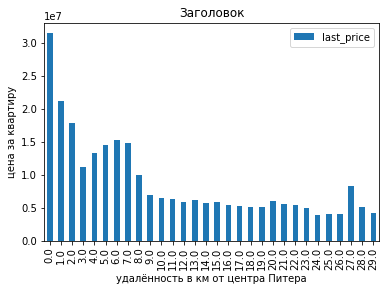

In [93]:
spb_center = df[df['locality_name'] == 'санкт-петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
    .plot.bar(title = 'Заголовок').set(ylabel='цена за квартиру', xlabel='удалённость в км от центра Питера') 

Меньшая удаленность от центра Питера означет более высокую цену квартиры.

### Общий вывод

В ходе исследования было выявлено, что данные cодержат достаточно большое количество пропусков, однако не по всем переменным. Больше всего пропущенных значений в переменной is_apartment, что является почти 90% пропусков датасета. Часть пропусков датасета была заменена средним значением, часть удалена, а часть оставлена в неизменном виде. Явных дубликатов нет. Неявные дубликаты были приведены в должный вид.
    
В ходе исследования было выявлено, что:

1.Цена квартиры зависит от удалённости от центра города Санкт - Петербурга - самые дорогие квартиры находятся в центре Санкт-Петербурга.
    
2.Квартиры, расплолженные на первом и последнем этаже, продаются по самым низким ценам по сравнению с квартирами, расположенными на других этажах.
    
3.В Санкт - Петербурге самые дорогие квартиры по сравнению с областью.
    
4.Цена не зависит от года, месяца или дня недели публикации.
    
5.Между переменными, характеризующими  жилую площадь, наблюдается  линейная положительная взаимосвязь с ценой на квартиры.